# Task 2 : Stock Market Analysis and Prediction

# Topic : AAPL Stock Analysis Using ARIMA Model

In [1]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import plotly.express as px
import warnings as w
import plotly.graph_objects as go
import pmdarima as pm
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
import matplotlib.pyplot as plt
import seaborn as sns
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/mayur/Downloads/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-01,23.379999,23.517500,23.282499,23.379999,20.680435,152892000
1,2014-07-02,23.467501,23.514999,23.272499,23.370001,20.671589,113860000
2,2014-07-03,23.417500,23.525000,23.299999,23.507500,20.793205,91567200
3,2014-07-07,23.535000,23.997499,23.525000,23.992500,21.222216,225872000
4,2014-07-08,24.067499,24.200001,23.480000,23.837500,21.085110,260888000
...,...,...,...,...,...,...,...
2511,2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2512,2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2513,2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2514,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,85.939954,86.864139,85.074581,86.004712,83.977176,1.253154e+08
std,59.082403,59.724828,58.493006,59.129097,59.609130,7.183802e+07
min,22.500000,22.917500,22.367500,22.584999,20.585348,2.404830e+07
25%,32.280626,32.618126,32.075001,32.271874,29.046707,7.639795e+07
50%,53.833750,54.497500,53.160000,53.767500,51.509075,1.061454e+08
75%,145.475002,147.200000,144.025002,145.852505,143.871673,1.536372e+08
max,217.589996,220.199997,213.000000,216.669998,216.669998,7.593852e+08


In [4]:
df.shape

(2516, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
# Create new year feature
df["Year"] = df["Date"].apply(lambda x: x.year)

In [8]:
# Aggregating by year
data_by_year = df.groupby("Year")

In [9]:
volumes = data_by_year["Volume"].mean()
sd = data_by_year["Volume"].std()

In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.sample(3)

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2015-08-11,29.452499,29.545000,28.332500,28.372499,25.652458,388331200,2015
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.493866,98444800,2018
2017-04-10,35.900002,35.970001,35.724998,35.792500,33.366760,75733600,2017


# Data Visualiazation

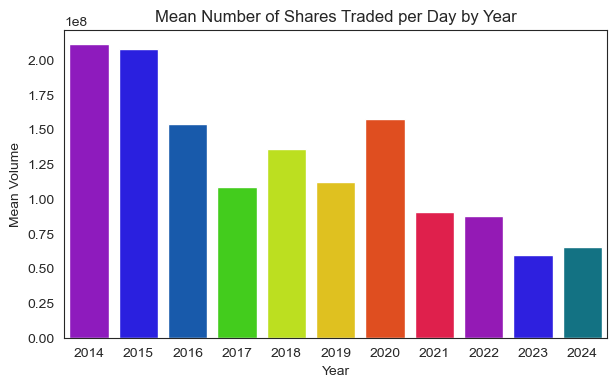

In [32]:
# Plotting
plt.figure(figsize=(7, 4))
sns.set_style("white")  # Remove grid
sns.barplot(x=volumes.index, y=volumes.values, palette="prism")
plt.xlabel("Year")
plt.ylabel("Mean Volume")
plt.title("Mean Number of Shares Traded per Day by Year")
plt.show()

### Interpretation
The mean number of shares traded per day by year plot provides insights into the trading activity of AAPL stock over the past decade. <br>The early years, particularly 2014 and 2015, saw the highest trading volumes, followed by a decline in subsequent years. <br>A notable spike in 2020 indicates increased trading activity, potentially due to market conditions. <br>Post-2020, the trading volume has stabilized at a lower level compared to the peak years.

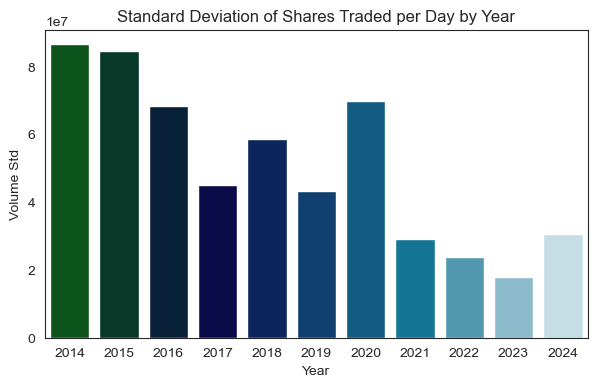

In [13]:
# Plotting
plt.figure(figsize=(7, 4))
sns.set_style("white")  # Remove grid
sns.barplot(x=sd.index, y=sd.values, palette="ocean")
plt.xlabel("Year")
plt.ylabel("Volume Std")
plt.title("Standard Deviation of Shares Traded per Day by Year")
plt.show()

### Interpretation
The plot illustrates the changing volatility in AAPL's daily trading volume over the years. Significant events and market conditions are reflected in the peaks and troughs of the standard deviation values. <br>The overall trend shows periods of high volatility (2014, 2015, 2020) followed by more stable trading volumes in recent years, with a slight uptick in 2024 possibly indicating emerging new trends.

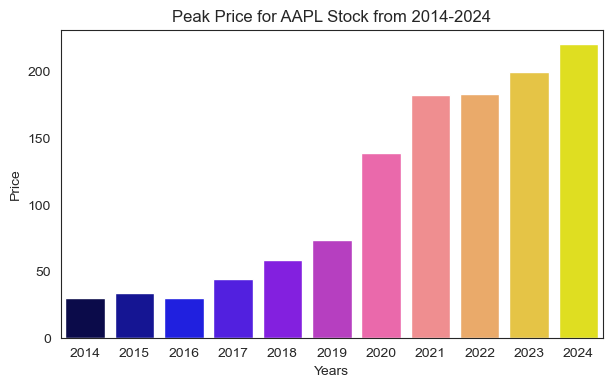

In [14]:
# Look at the peak value for each year
peaks = data_by_year["High"].max()
plt.figure(figsize=(7, 4))
sns.set_style("white")  # Remove grid
sns.barplot(x=peaks.index, y=peaks.values, palette="gnuplot2")
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Peak Price for AAPL Stock from 2014-2024")
plt.show()

### Interpretation
The plot clearly illustrates a strong and consistent growth trajectory for AAPL's peak stock prices over the past decade. <br>The steady increase, especially post-2018, indicates positive investor sentiment and possibly strong business performance and innovation from Apple Inc. <br>This upward trend in peak prices aligns with the company's continued market leadership and financial success.

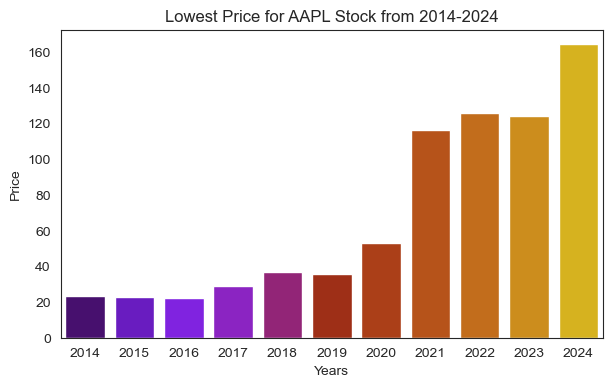

In [15]:
# Look at the lowest value for each year
valleys = data_by_year["Low"].min()
plt.figure(figsize=(7, 4))
sns.set_style("white")  # Remove grid
sns.barplot(x=valleys.index, y=valleys.values, palette="gnuplot")
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Lowest Price for AAPL Stock from 2014-2024")
plt.show()

### Interpretation
The plot illustrates a strong and consistent upward trend in the lowest prices of AAPL stock over the past decade. The steady increase, especially post-2017, indicates positive market performance and growing investor confidence. <br>This trend suggests that even during market lows, AAPL stock retains significant value, reflecting its robustness and the company's continued success in maintaining and increasing its market worth.

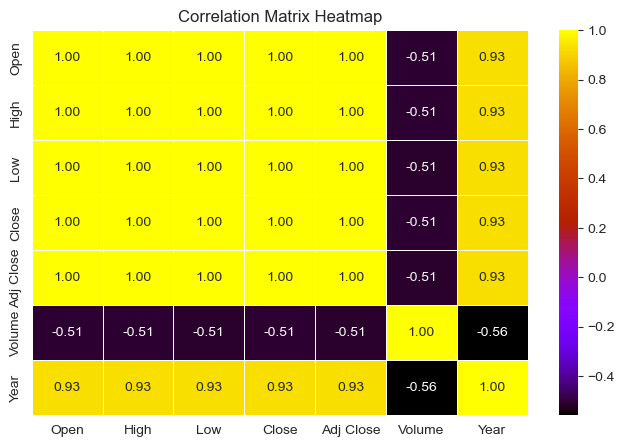

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='gnuplot', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Interpretation
The correlation matrix heatmap provides valuable insights into the relationships between different stock data features for AAPL. <br>The perfect correlation among Open, High, Low, Close, and Adj Close prices confirms their expected interdependence. <br>The negative correlation between Volume and these price features indicates an inverse relationship, while the strong positive correlation with the Year highlights a general upward trend in AAPL prices over time. <br>The negative correlation between Year and Volume suggests that while prices are increasing, the trading volume has a tendency to decrease over the years.

# ARIMA Model Forecasting of Stock Price

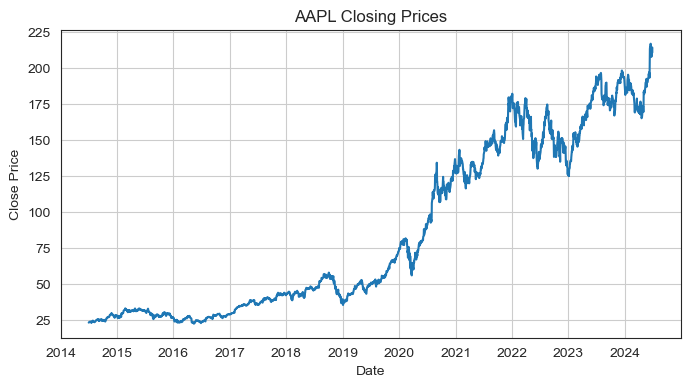

In [17]:
# Plot the 'Close' prices
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'])
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## Autocorrelation and Partial Autocorrelation Analysis

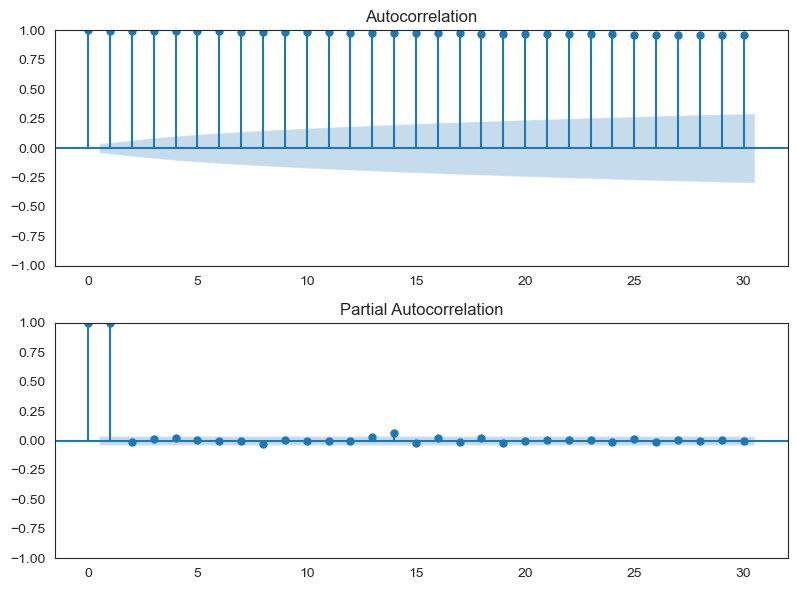

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(df['Close'].dropna(), lags=30, ax=ax[0])
plot_pacf(df['Close'].dropna(), lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

## Stationarity Test and Differencing for AAPL

In [19]:
def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Reject Ho: Series has no unit root, indicating it is stationary")
    else:
        print("Accept Ho: Time series has a unit root, indicating it is non-stationary")

In [20]:
stationarity(df['Close'])

Test Statistic: 0.29144083893035216
P-Value: 0.9769483714432659
Accept Ho: Time series has a unit root, indicating it is non-stationary


In [21]:
diff_1_close = df['Close'].diff().dropna()

stationarity(diff_1_close)

Test Statistic: -10.78287358666562
P-Value: 2.231983791816318e-19
Reject Ho: Series has no unit root, indicating it is stationary


In [22]:
d_val = ndiffs(df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


<Axes: xlabel='Date'>

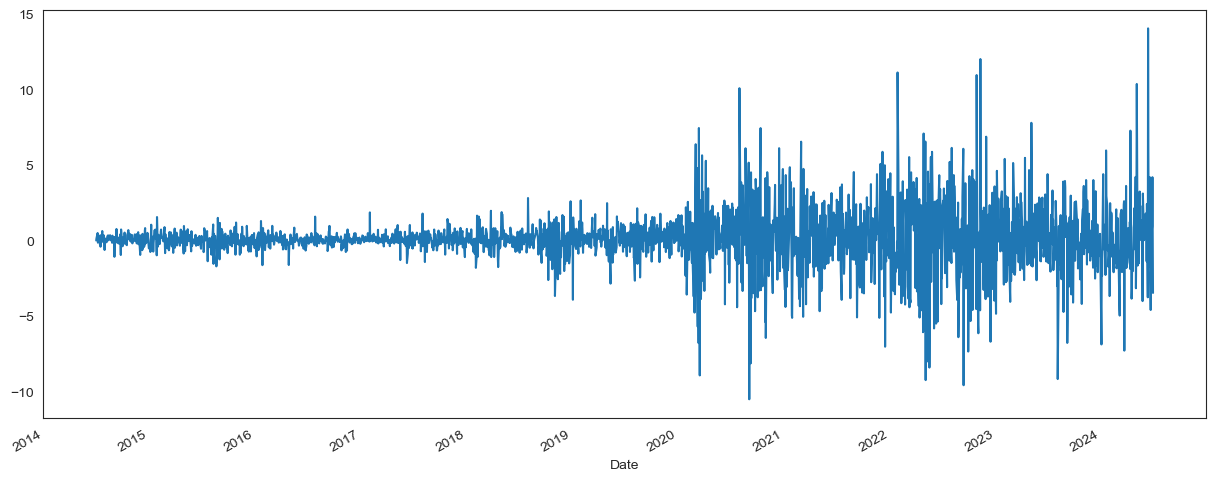

In [23]:
diff_1_close.plot(figsize=(15,6))

## ACF and PACF Analysis - Differenced

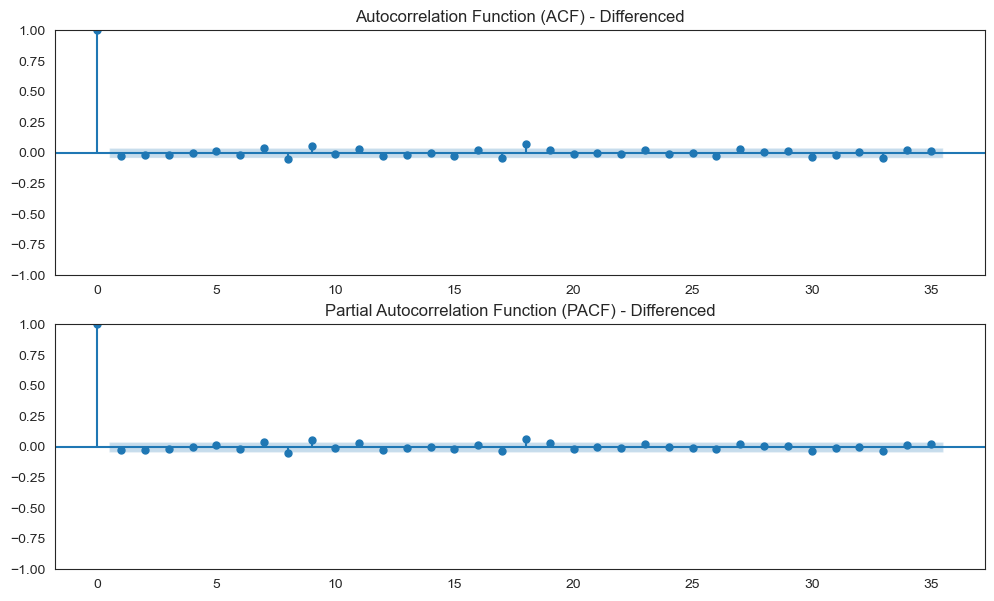

In [24]:
def plot_acf_pacf(diff_1_close):

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

    # ACF plot
    plot_acf(diff_1_close, ax=axes[0])
    axes[0].set_title("Autocorrelation Function (ACF) - Differenced")

    # PACF plot
    plot_pacf(diff_1_close, ax=axes[1])
    axes[1].set_title("Partial Autocorrelation Function (PACF) - Differenced")

plot_acf_pacf(diff_1_close)

## ARIMA Model Selection

In [25]:
#splitting the data to train and test sets based on Ntest value
#last 60 days
Ntest = 90
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 5,
                      start_q = 0,
                      max_q = 5,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=9696.963, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=9696.663, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=9697.547, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=9699.193, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=9700.937, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=9700.057, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=9696.761, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=9697.393, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=9699.257, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=9692.540, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=9690.328, Time=0.68 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=9690.172, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=9697.656, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=9699.250, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=9662.650, Time=1.35 sec
 ARIMA(2,1

In [26]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2426
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4825.325
Date:                Fri, 02 Aug 2024   AIC                           9662.650
Time:                        19:40:09   BIC                           9697.412
Sample:                             0   HQIC                          9675.290
                               - 2426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2503      0.138      1.820      0.069      -0.019       0.520
ar.L1         -1.8579      0.007   -255.752      0.000      -1.872      -1.844
ar.L2         -0.9746      0.007   -137.081      0.0

## Residual and Density Plot

In [27]:
residuals = model.resid()  # Call the method to retrieve numeric values
ax[0].plot(residuals)

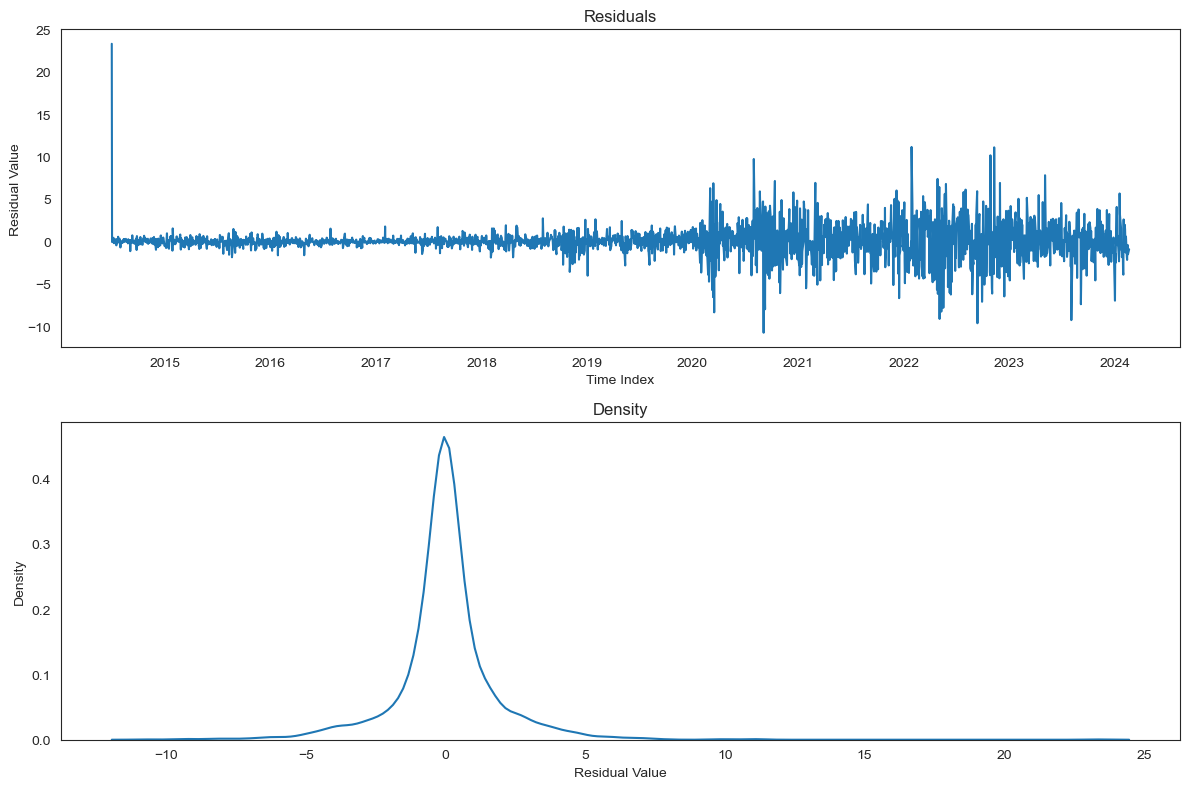

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot residuals vs time series index
ax[0].plot(residuals)
ax[0].set_title('Residuals')
ax[0].set_xlabel('Time Index')
ax[0].set_ylabel('Residual Value')


# Plot the density of residuals using seaborn
sns.kdeplot(residuals, ax=ax[1])
ax[1].set_title('Density')
ax[1].set_xlabel('Residual Value')
ax[1].set_ylabel('Density')

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()

## Forecasting of Stock Prices

In [29]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [30]:
def plot_result(model, data, col_name, Ntest):
    
    params = model.get_params()
    d = params['order'][1]
    
    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)
    
    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(10,4))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='purple', alpha=0.3)
    ax.legend()
    
    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Root Mean Squared Error:  13.324681934663433
Mean Absolute Error:  11.01496916918967


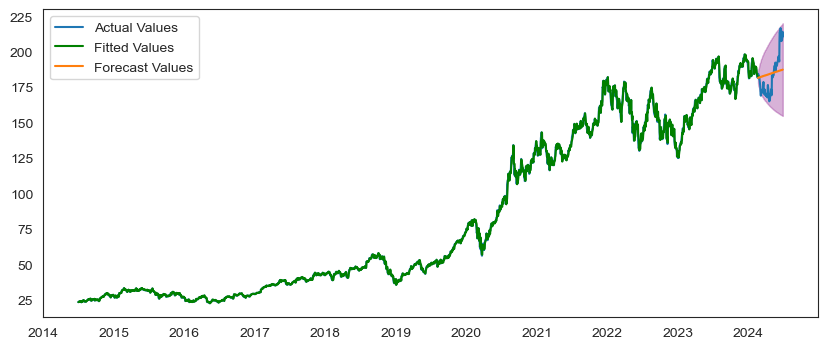

In [31]:
rmse , mae = plot_result(model, df, 'Close', Ntest=90)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)